In [43]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv("Updated_heart_prediction.csv")
df.head()

,Unnamed: 0,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,Oxygen Saturation
0,0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0,98.6
1,1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0,98.6
2,2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1.0,98.6
3,3,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1.0,98.1
4,4,57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1.0,97.5


In [44]:
# Drop unnecessary index column
df.drop(columns=["Unnamed: 0"], inplace=True)
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,Oxygen Saturation
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0,98.6
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0,98.6
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1.0,98.6
3,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1.0,98.1
4,57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1.0,97.5


In [45]:
# Split into features and target
X = df.drop(columns=["output"])
y = df["output"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


/tmp/ipython-input-46-1364850840.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='output', data=df, palette='Set2')


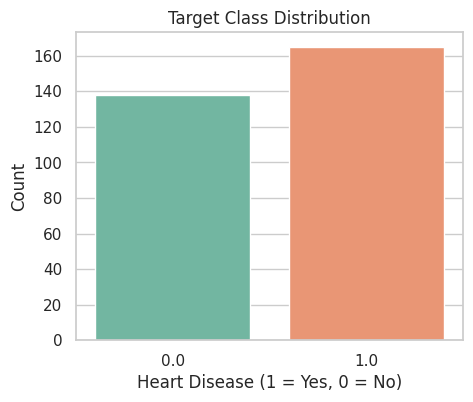

In [46]:
# Display target variable distribution
plt.figure(figsize=(5, 4))
sns.countplot(x='output', data=df, palette='Set2')
plt.title('Target Class Distribution')
plt.xlabel('Heart Disease (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()

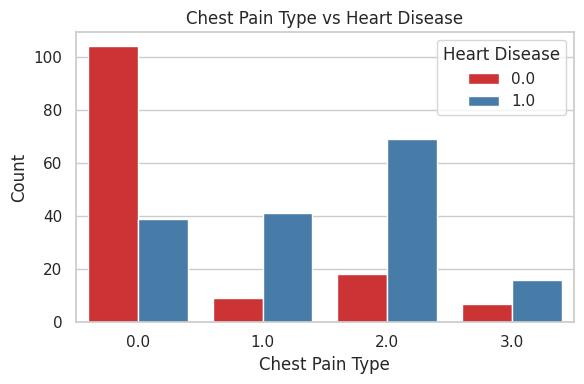

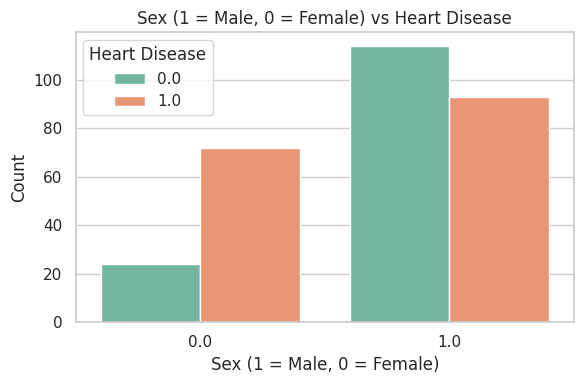

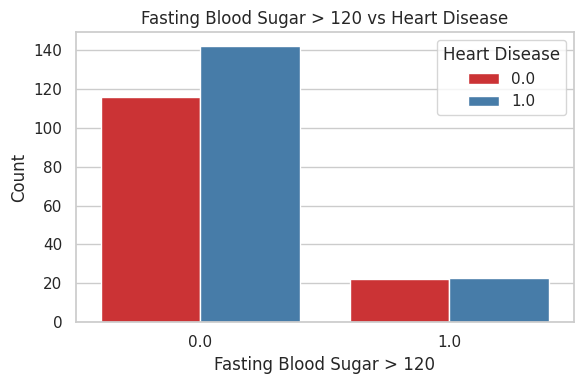

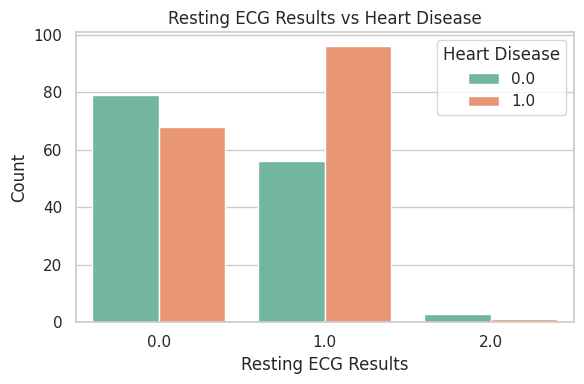

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set seaborn style
sns.set(style="whitegrid")

# Define dataset (assuming df is already loaded and cleaned)
# Example: df = pd.read_csv("Updated_heart_prediction.csv")

# Custom color palettes for first 4 features
custom_palettes = {
    'cp': 'Set1',
    'sex': 'Set2',
    'fbs': 'Set1',
    'restecg': 'Set2'
}

# Function to plot a categorical feature with hue='output'
def plot_categorical_feature(col, xlabel):
    palette = custom_palettes.get(col, 'pastel')  # Use defined palette or default
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, hue='output', data=df, palette=palette)
    plt.title(f'{xlabel} vs Heart Disease')
    plt.xlabel(xlabel)
    plt.ylabel("Count")
    plt.legend(title='Heart Disease')
    plt.tight_layout()
    plt.show()

# Plot only the first 4 relevant categorical features
plot_categorical_feature('cp', 'Chest Pain Type')
plot_categorical_feature('sex', 'Sex (1 = Male, 0 = Female)')
plot_categorical_feature('fbs', 'Fasting Blood Sugar > 120')
plot_categorical_feature('restecg', 'Resting ECG Results')

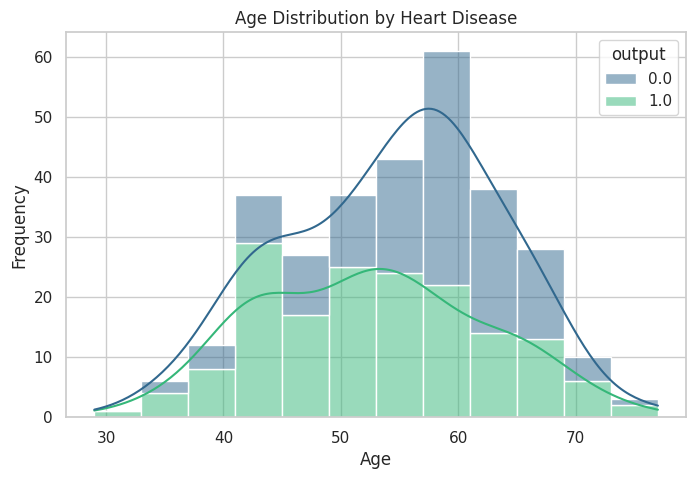

In [48]:
# Age distribution by heart disease
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x="age", hue="output", kde=True, multiple="stack", palette='viridis')
plt.title("Age Distribution by Heart Disease")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

/tmp/ipython-input-49-1245946273.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='output', y='chol', data=df, palette="Set1")


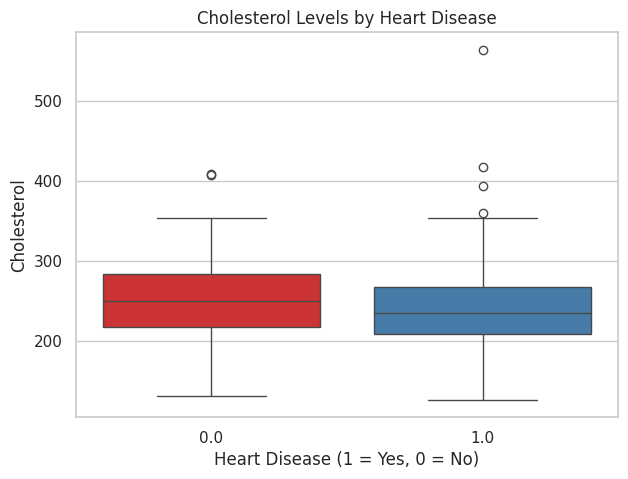

In [49]:
# Boxplot of cholesterol by target
plt.figure(figsize=(7, 5))
sns.boxplot(x='output', y='chol', data=df, palette="Set1")
plt.title("Cholesterol Levels by Heart Disease")
plt.xlabel("Heart Disease (1 = Yes, 0 = No)")
plt.ylabel("Cholesterol")
plt.show()

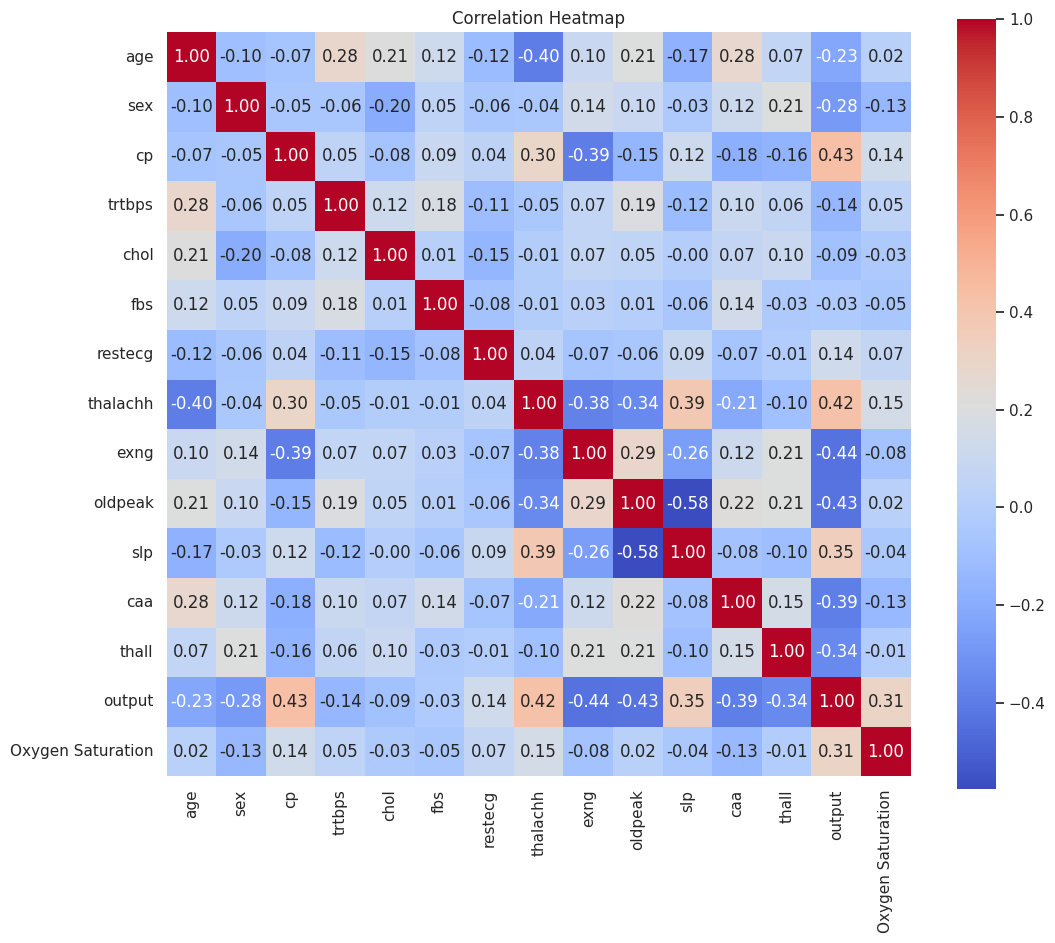

In [50]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title('Correlation Heatmap')
plt.show()

In [51]:
# Initialize 4 ML models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": GaussianNB()
}

# Train and evaluate the models
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results.append({"Model": name, "Accuracy": acc})

# Create comparison DataFrame
results_df = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False).reset_index(drop=True)
print(results_df)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                 Model  Accuracy
0  Logistic Regression  0.885246
1        Random Forest  0.885246
2          Naive Bayes  0.885246
3        Decision Tree  0.868852


In [52]:
import joblib
final_model = models["Random Forest"]
joblib.dump(final_model, "heart_model.pkl")
print("✅ Random Forest model saved as 'heart_model.pkl'")

✅ Random Forest model saved as 'heart_model.pkl'


In [53]:
from google.colab import files
files.download("heart_model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>